In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from utils.source import import_yahoo_close 
from utils.hurst import hurst_exponent
import nolds

Import asset data from Yahoo.

In [10]:
asset = ['BTC-USD', 'ETH-USD', '^GSPC', 'EURUSD=X', 'SI=F', 'ACAEUO.MI',
        'ACAPER.MI', 'ACABRT.MI', 'XMLC.F', 'XDW0.DE', 'BRK-A', '7309.T', 'AIGI.MI', 
         'WEAT.MI']
#data = import_yahoo_close(asset).dropna()
data = pd.read_csv('asset-crashes.csv')
data['Date'] = data['Date'].astype('datetime64')
data = data.set_index('Date')
data.head()

,BTC-USD,ETH-USD,^GSPC,EURUSD=X,SI=F,ACAEUO.MI,ACAPER.MI,ACABRT.MI,XMLC.F,XDW0.DE,BRK-A,7309.T,AIGI.MI,WEAT.MI
Date,,,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,1.438994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,1132.989990,1.442398,17.440001,NaN,NaN,NaN,NaN,NaN,99600.0,3335.312256,12.69,1.552
2010-01-05,NaN,NaN,1136.520020,1.436596,17.781000,NaN,NaN,NaN,NaN,NaN,99710.0,3321.935303,12.67,1.546
2010-01-06,NaN,NaN,1137.140015,1.440403,18.163000,NaN,NaN,NaN,NaN,NaN,99850.0,3321.935303,13.17,1.548
2010-01-07,NaN,NaN,1141.689941,1.431803,18.333000,NaN,NaN,NaN,NaN,NaN,100000.0,3330.853271,13.00,1.565


Estimate Hurst exponent with different algorithms.

<AxesSubplot: xlabel='Date'>

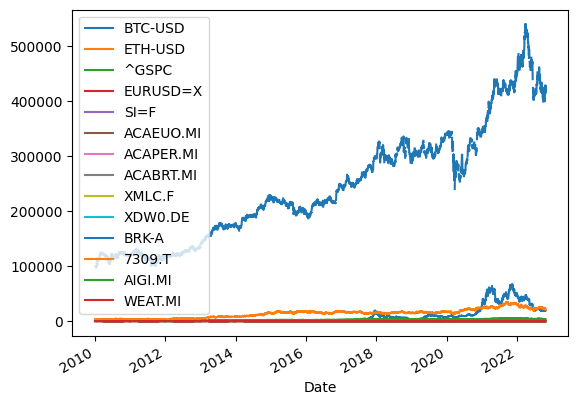

In [11]:
data.plot()

<AxesSubplot: xlabel='Date'>

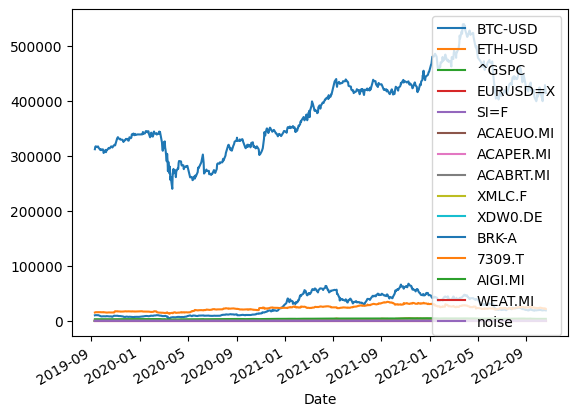

In [14]:
data['noise'] = np.random.random(len(data))
data['noise'] = data['noise'] - 0.5
asset.append('noise')
data = data.dropna()
data.plot()

In [15]:
hurst_methods = [
    data.apply(lambda x: hurst_exponent(x, method='DSOD')),
    data.apply(lambda x: hurst_exponent(x, method='RS')),
    data.apply(lambda x: hurst_exponent(x, method='DMA')),
    data.apply(lambda x: nolds.hurst_rs(x)),
    #data.apply(lambda x: nolds.hurst_rs(x.dropna(), nvals=nolds.binary_n(10000))),
    #data.apply(lambda x: nolds.hurst_rs(x.dropna(), nvals=nolds.logarithmic_n(1, 100, 10)))
]
hurst_table = pd.concat(hurst_methods, axis=1)
hurst_table.columns = ['DSOD', 'RS', 'DMA', 'nolds.rs']#, "nolds.rs.binary_n", "nolds.rs.log_n"]
hurst_table

,DSOD,RS,DMA,nolds.rs
BTC-USD,0.423978,0.586136,0.524733,0.917887
ETH-USD,0.446826,0.583240,0.511004,0.903905
^GSPC,0.310273,0.521639,0.576396,0.916892
EURUSD=X,0.485463,0.526174,0.661791,0.888907
SI=F,0.499862,0.594185,0.468123,0.920489
ACAEUO.MI,0.632272,0.685664,0.694935,0.893327
ACAPER.MI,0.537406,0.670418,0.614267,0.906429
ACABRT.MI,0.615976,0.690195,0.690046,0.909524
XMLC.F,0.494110,0.562955,0.601554,0.944676
XDW0.DE,0.537034,0.637042,0.590620,0.928233


Nolds computation seems more reasonable given the score it gives to noise (close to 0.5 as it should be).

In [16]:
hurst_table['nolds.rs'].sort_values()

noise        0.437591
EURUSD=X     0.888907
WEAT.MI      0.889517
ACAEUO.MI    0.893327
ETH-USD      0.903905
ACAPER.MI    0.906429
ACABRT.MI    0.909524
AIGI.MI      0.912850
^GSPC        0.916892
BTC-USD      0.917887
SI=F         0.920489
XDW0.DE      0.928233
7309.T       0.928824
BRK-A        0.930412
XMLC.F       0.944676
Name: nolds.rs, dtype: float64

What about log returns? Are we interested in prices or in log returns persistence?

<AxesSubplot: xlabel='Date'>

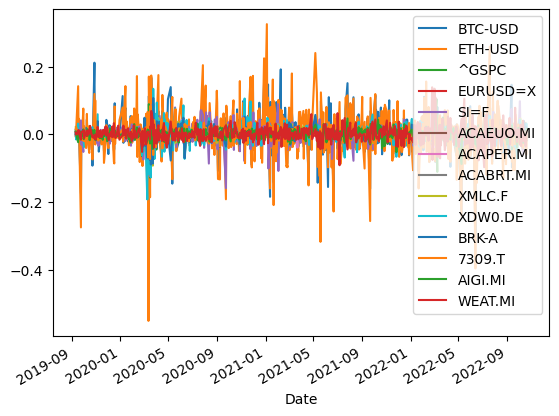

In [21]:
log_returns = np.log(data.drop('noise', axis=1)).diff().dropna()
log_returns.plot()

In [23]:
hurst_methods = [
    log_returns.apply(lambda x: hurst_exponent(x, method='DSOD')),
    log_returns.apply(lambda x: hurst_exponent(x, method='RS')),
    log_returns.apply(lambda x: hurst_exponent(x, method='DMA')),
    log_returns.apply(lambda x: nolds.hurst_rs(x)),
    #data.apply(lambda x: nolds.hurst_rs(x.dropna(), nvals=nolds.binary_n(10000))),
    #data.apply(lambda x: nolds.hurst_rs(x.dropna(), nvals=nolds.logarithmic_n(1, 100, 10)))
]
hurst_table_log = pd.concat(hurst_methods, axis=1)
hurst_table_log.columns = ['DSOD', 'RS', 'DMA', 'nolds.rs']#, "nolds.rs.binary_n", "nolds.rs.log_n"]
hurst_table_log

,DSOD,RS,DMA,nolds.rs
BTC-USD,-0.114278,0.314725,0.016570,0.489021
ETH-USD,-0.127307,0.331382,0.013597,0.461477
^GSPC,-0.382133,0.262612,0.011580,0.471979
EURUSD=X,-0.074973,0.265775,0.010653,0.522791
SI=F,-0.009675,0.301850,0.011178,0.557800
ACAEUO.MI,0.052759,0.354248,0.017156,0.650311
ACAPER.MI,-0.026432,0.357094,0.014094,0.648481
ACABRT.MI,0.009080,0.350190,0.016404,0.651107
XMLC.F,-0.005260,0.233656,0.012037,0.498133
XDW0.DE,0.072811,0.307144,0.013918,0.540965


In [26]:
hurst_table_log['nolds.rs'].sort_values()

7309.T       0.436796
ETH-USD      0.461477
^GSPC        0.471979
BTC-USD      0.489021
XMLC.F       0.498133
EURUSD=X     0.522791
XDW0.DE      0.540965
AIGI.MI      0.549299
BRK-A        0.555714
SI=F         0.557800
WEAT.MI      0.564150
ACAPER.MI    0.648481
ACAEUO.MI    0.650311
ACABRT.MI    0.651107
Name: nolds.rs, dtype: float64